In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualisation de données avec matplotlib et pandas

Chargez le dataset Indicator et, en vous inspirant des notebooks relatifs à la visualisation par matplotlib et pandas proposés sur l'espace de cours, produisez des cellules de code réalisant pour répondre aux instructions suivantes. 

Les graphiques devront porter un titre. Leurs axes devront être nommés et les unités précisées. Utilisez éventuellement les légendes ou les échelles de couleur si nécessaire de sorte que le graphique soit suffisant pour véhiculer une information claire.

In [2]:
df = pd.read_csv("Indicators.csv")
df

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


Affichez l'histogramme des valeurs d'émission de CO2 par habitant des pays sur l'année 1976.

(array([145.,  32.,   7.,   3.,   0.,   3.,   0.,   0.,   0.,   2.]),
 array([9.86879508e-03, 6.38316168e+00, 1.27564546e+01, 1.91297474e+01,
        2.55030403e+01, 3.18763332e+01, 3.82496261e+01, 4.46229190e+01,
        5.09962119e+01, 5.73695047e+01, 6.37427976e+01]),
 <BarContainer object of 10 artists>)

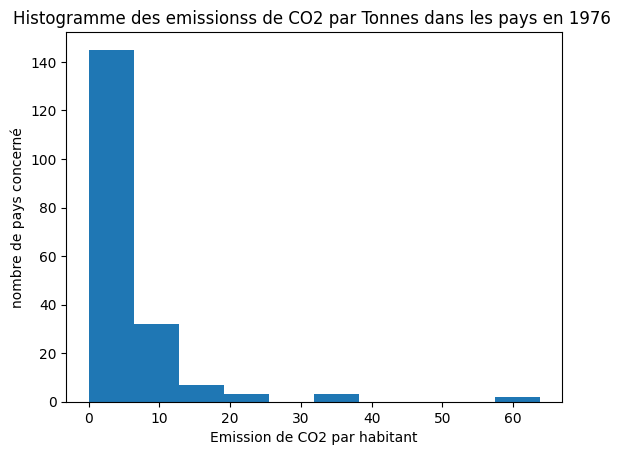

In [3]:
sub_df = df.loc[
     (df["IndicatorName"] == "CO2 emissions (metric tons per capita)") & 
     (df["Year"] == 1976), "Value"
]
plt.title("Histogramme des emissionss de CO2 par Tonnes dans les pays en 1976 ")

plt.xlabel("Emission de CO2 par habitant")
plt.ylabel("nombre de pays concerné")
plt.hist(sub_df)

Utilisez un graphique en ligne pour afficher l'évolution des émission de CO2 par habitant sur l'ensemble des années disponibles pour les pays suivants : 
- Luxembourg
- Qatar
- United States
- german
- France
- Chine
- Inde
- Sénégal

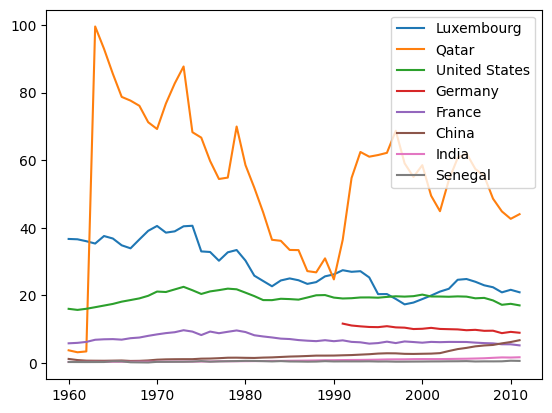

In [4]:
countries = [
    "Luxembourg",
"Qatar",
"United States",
"Germany",
"France",
"China",
"India",
"Senegal"
]

co2df = df[df["IndicatorName"] == "CO2 emissions (metric tons per capita)"]

for country in countries:
    data = co2df[co2df["CountryName"] == country]
    plt.plot(data["Year"], data["Value"], label=country)


plt.legend(loc=1)

Utiliser un graphique en nuage de points pour afficher un graphique représentant en abscisse le PIB (GDP per capita (current US$)) et en ordonnée l'espérance de vie pour l'année 1985.

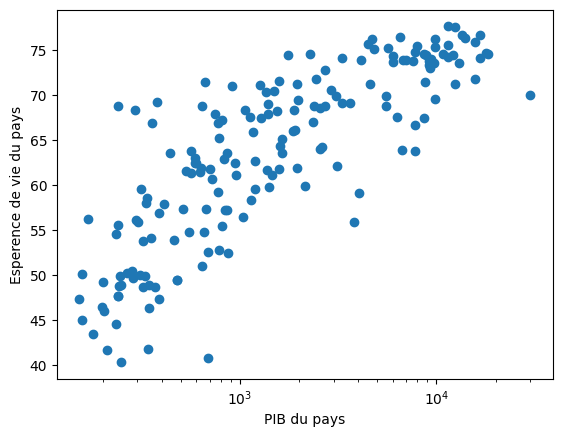

In [5]:
df_pib85 = df.loc[
     (df["IndicatorName"] == "GDP per capita (current US$)") &
     (df["Year"] == 1985), ["Value", "CountryName"]
]
df_pib85 = df_pib85.rename(columns={"Value" : "PIB"})

df_espvie85 = df.loc[
     (df["IndicatorName"] == "Life expectancy at birth, total (years)") &
     (df["Year"] == 1985), ["Value", "CountryName"]
]
df_espvie85 = df_espvie85.rename(columns={"Value" : "Esperence de vie"})

data = pd.merge(df_pib85, df_espvie85, on="CountryName")

plt.scatter(data["PIB"], data["Esperence de vie"])
plt.xlabel("PIB du pays")
plt.ylabel("Esperence de vie du pays")
plt.xscale("log")

Modifiez le graphique précédent de telle sorte que la surface des disques soit proportionnelle à la population du pays et que la couleur soit associée au taux d'alphabetisation (Adult literacy rate, population 15+ years, both sexes (%))

In [6]:
df_co2 = df.loc[
     (df["IndicatorName"] == "CO2 emissions (metric tons per capita)") &
     (df["Year"] == 1985), ["Value", "CountryName"]
]
df_co2 = df_co2.rename(columns={"Value" : "CO2"})

df_popu85 = df.loc[
     (df["IndicatorName"] == "Population, total") &
     (df["Year"] == 1985), ["Value", "CountryName"]
]
df_popu85 = df_popu85.rename(columns={"Value" : "population"})


data2 = pd.merge(data, df_co2, on="CountryName", how="outer")


data2 = pd.merge(data2, df_popu85, on="CountryName", how="outer")

data2

,PIB,CountryName,Esperence de vie,CO2,population
0,1580.252659,Arab World,61.848904,3.066959,1.914254e+08
1,2698.074456,Caribbean small states,68.754261,5.525586,5.786277e+06
2,1394.469981,East Asia & Pacific (all income levels),67.938233,2.250591,1.682520e+09
3,356.100545,East Asia & Pacific (developing only),66.917048,1.546489,1.473633e+09
4,7818.682325,Euro area,74.757644,7.897234,3.059680e+08
...,...,...,...,...,...
239,NaN,Turkmenistan,NaN,NaN,3.229499e+06
240,NaN,Turks and Caicos Islands,NaN,NaN,9.502000e+03
241,NaN,Tuvalu,NaN,NaN,8.648000e+03
242,NaN,Ukraine,NaN,NaN,5.091700e+07


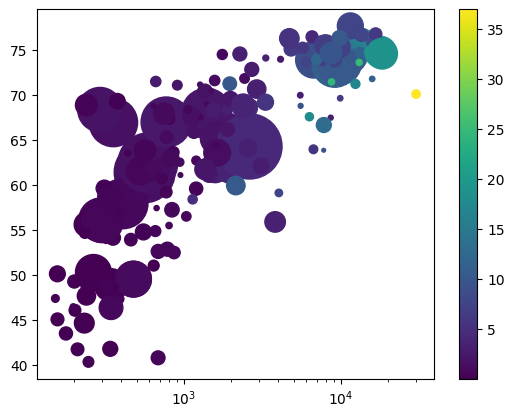

In [7]:
plt.scatter(data2["PIB"], data2["Esperence de vie"], c=data2["CO2"], s=np.sqrt(data2["population"]/1000))
plt.xscale('log')
plt.colorbar()

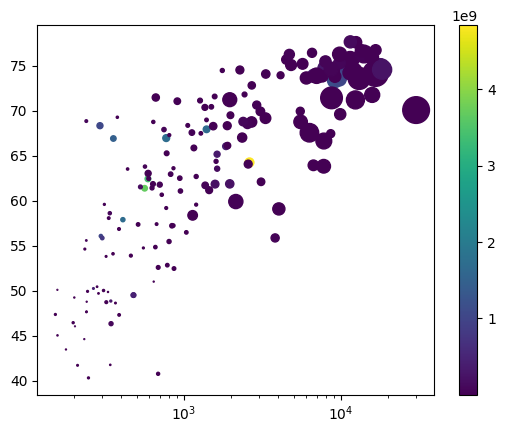

In [8]:
plt.scatter(data2["PIB"], data2["Esperence de vie"], c=data2["population"], s=data2["CO2"]*10)
plt.xscale('log')
plt.colorbar()

In [9]:
import plotly.express as px
import ipywidgets as ipw

Complétez le graphique en le dotant de fonctionnalités d'interaction de telle sorte qu'un clic sur un point permette l'affichage des informations suivantes relatives à l'année 1985 : 
- Nom du pays
- Valeur de l'espérance de vie
- Valeur du PIB
- Taille de la population
- Taux d'alphabétisation

In [10]:
df_alpha85 =  df.loc[
     (df["IndicatorName"] == "Adult literacy rate, population 15+ years, both sexes (%)") &
     (df["Year"] == 1985), ["Value", "CountryName"]
]

df_alpha85 = df_alpha85.rename(columns={"Value" : "Alphabetisation"})

data = pd.merge(df_pib85, df_espvie85, on="CountryName")
data = pd.merge(data, df_popu85, on="CountryName")
data = pd.merge(data, df_alpha85, on="CountryName")

data

,PIB,CountryName,Esperence de vie,population,Alphabetisation
0,12358.510707,Kuwait,71.203463,1735320.0,74.49087
1,670.821729,Maldives,57.408146,189551.0,92.23005
2,3322.308159,Malta,74.080561,336452.0,87.98217
3,1367.173131,Turkey,61.714439,49178079.0,75.96824
4,30067.134163,United Arab Emirates,70.076634,1350433.0,71.23530
5,1571.103581,Uruguay,71.583463,3011907.0,95.37997


Ces données n'ont pas assez d'observations

In [11]:
px.scatter(data,y="Esperence de vie", x="PIB", color="population", size="Alphabetisation", hover_name="CountryName", height=500, log_x=False, size_max=50)

In [12]:
data2 = data2.dropna()
px.scatter(data2,y="Esperence de vie", x="PIB", color="population", size="CO2", hover_name="CountryName", height=500, log_x=True, size_max=50)


Modifier le graphique en le transformant en une animation de sorte que les différentes frames permettent la visualisation des données pour les années successives.

In [13]:
data

,PIB,CountryName,Esperence de vie,population,Alphabetisation
0,12358.510707,Kuwait,71.203463,1735320.0,74.49087
1,670.821729,Maldives,57.408146,189551.0,92.23005
2,3322.308159,Malta,74.080561,336452.0,87.98217
3,1367.173131,Turkey,61.714439,49178079.0,75.96824
4,30067.134163,United Arab Emirates,70.076634,1350433.0,71.23530
5,1571.103581,Uruguay,71.583463,3011907.0,95.37997


In [22]:
# Pivoter le DataFrame pour obtenir les colonnes P, C, Q, Année et Pays
costum_df = df[
        (df["IndicatorName"] == "CO2 emissions (metric tons per capita)") | 
        (df["IndicatorName"] == "GDP per capita (current US$)") |
        (df["IndicatorName"] == "Life expectancy at birth, total (years)") |
        (df["IndicatorName"] == "Population, total")
][["Year", "IndicatorName", "Value", "CountryName"]]

data = costum_df.pivot_table(index=['Year', 'CountryName'], columns='IndicatorName', values='Value').reset_index()

# Renommer les colonnes
data.columns.name = None  # Supprimer le nom de la colonne pour une apparence plus propre
data = data.rename(columns={'CO2 emissions (metric tons per capita)': 'CO2',
                                    'Life expectancy at birth, total (years)': 'Life',
                                    'Population, total': 'population',
                                    'GDP per capita (current US$)': 'PIB'})

data = data.dropna()
data

,Year,CountryName,CO2,PIB,Life,population
0,1960,Afghanistan,0.046068,59.787681,32.328512,8.994793e+06
2,1960,Algeria,0.553764,244.823735,46.135122,1.112489e+07
11,1960,Australia,8.582937,1806.804876,70.817073,1.027648e+07
12,1960,Austria,4.373319,935.460427,68.585610,7.047539e+06
14,1960,"Bahamas, The",3.749831,1550.337434,62.729049,1.095260e+05
...,...,...,...,...,...,...
12741,2011,West Bank and Gaza,0.572407,2664.951385,72.829439,3.927051e+06
12742,2011,World,4.944649,10368.882817,70.747375,7.007471e+09
12743,2011,"Yemen, Rep.",0.919968,1282.398832,63.053537,2.423494e+07
12744,2011,Zambia,0.212450,1654.525289,57.422195,1.434353e+07


In [25]:
px.scatter(data, 
                 y="Life", 
                 x="PIB", 
                 color="population", 
                 size="CO2", 
                 hover_name="CountryName", 
                 animation_frame="Year",  # Ajoutez cette ligne pour l'animation
                 height=500, 
                 log_x=True, 
                 size_max=50)

Utilisez les fonctionnalités de la bibliothèque ipywidgets pour permettre l'affichage de l'évolution au fil des ans d'un indicateur (choisi dans une liste déroulante) pour deux pays, chacun étant choisi dans une liste déroulante.

In [17]:
def affichage(indicator,pays1, pays2, log : bool):
    data=df[(
        df['IndicatorName']==indicator) & 
        (
            (df['CountryName']==pays1) | 
            (df['CountryName']==pays2)
        )

    ]
    axe={'Value':indicator}
    titre=f"L'évolution au fil des ans de {indicator} pour les pays {pays1} et {pays2}"
    return px.scatter(
        data,x=data['Year'], y=data['Value'],
        hover_name=data['CountryName'],
        color=data['CountryName'], log_y=log,
        height=500,title=titre,labels=axe)

indicateurs =df['IndicatorName'].unique()
pays=df['CountryName'].unique()
ipw.interact(affichage,indicator=indicateurs,pays1=pays,pays2=pays,log=True)

interactive(children=(Dropdown(description='indicator', options=('Adolescent fertility rate (births per 1,000 …

<function __main__.affichage(indicator, pays1, pays2, logy: bool)>

Utilisez un widget pour sélectionner la date pour laquelle vous souhaitez visualiser le nuage de points (espérance de vie vs. PIB avec population et taux d'alphabétisation)

In [31]:
def affichage(year):
    data=df[df['Year']==year]
    pib=data.loc[data['IndicatorName']=='GDP per capita (current US$)',['CountryName','Value']]
    life=data.loc[data['IndicatorName']=='Life expectancy at birth, total (years)',['CountryName','Value']]
    dt1=pd.merge(pib,life,how='inner',on='CountryName')
    dt1.columns=['CountryName','PIB','LieExprency']
    pop=data.loc[data['IndicatorName']=='Population, total',['CountryName','Value']]
    pop.columns=['CountryName','Populat']
    co2=data.loc[data['IndicatorName']=="CO2 emissions (metric tons per capita)",['CountryName','Value']]
    co2.columns=['CountryName','Co2']
    dt2=pd.merge(dt1,pop,how='inner',on='CountryName')
    rest=pd.merge(dt2,co2,how='inner',on='CountryName')
    return px.scatter(rest,y=rest['LieExprency'],x=rest['PIB'],hover_name=rest['CountryName'],size=rest['Populat'],color=rest['Co2'],log_x=True,height=500,size_max=50)

def affichage2(year : int):
    costum_df = df[
        (df["Year"] == year) & (
            (df["IndicatorName"] == "CO2 emissions (metric tons per capita)") | 
            (df["IndicatorName"] == "GDP per capita (current US$)") |
            (df["IndicatorName"] == "Life expectancy at birth, total (years)") |
            (df["IndicatorName"] == "Population, total")
        )
    ][["Year", "IndicatorName", "Value", "CountryName"]]

    data = costum_df.pivot_table(index=['Year', 'CountryName'], columns='IndicatorName', values='Value').reset_index()

    
    data.columns.name = None  
    data = data.rename(columns={'CO2 emissions (metric tons per capita)': 'CO2',
                                        'Life expectancy at birth, total (years)': 'Life',
                                        'Population, total': 'population',
                                        'GDP per capita (current US$)': 'PIB'})
    data = data.dropna()
    return px.scatter(data,
                      y="Life", x="PIB", 
                      hover_name="CountryName", 
                      size="population", color="CO2", 
                      log_x=True,height=500, size_max=50
                    )


years=df['Year'].unique()
ipw.interact(affichage2,year=years)

interactive(children=(Dropdown(description='year', options=(1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 19…

<function __main__.affichage2(year: int)>